<a href="https://colab.research.google.com/github/vivekswamy021/Birth_Rate_Analysis/blob/main/BIRTH_RATE_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Import libraries**


In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#**Load the Data**

In [107]:
from google.colab import files
uploaded = files.upload()

Saving births.csv to births (1).csv


In [108]:
df=pd.read_csv("births.csv")
df

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548
...,...,...,...,...,...
15542,2008,10,NaN,M,183219
15543,2008,11,NaN,F,158939
15544,2008,11,NaN,M,165468
15545,2008,12,NaN,F,173215


In [109]:
df.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


#**Data Understanding**


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15547 entries, 0 to 15546
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    15547 non-null  int64  
 1   month   15547 non-null  int64  
 2   day     15067 non-null  float64
 3   gender  15547 non-null  object 
 4   births  15547 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 607.4+ KB


In [111]:
df.columns

Index(['year', 'month', 'day', 'gender', 'births'], dtype='object')

In [112]:
df["year"].unique()

array([1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979,
       1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008])

In [113]:
df["month"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [114]:
df["day"].unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 99., nan])

In [115]:
df["gender"].unique()

array(['F', 'M'], dtype=object)

In [116]:
df["gender"].value_counts()

,count
gender,
F,7776
M,7771


In [117]:
df["births"].value_counts()

,count
births,
2,95
4,54
1,42
8,28
6,28
...,...
6019,1
5938,1
6337,1


In [118]:
df.describe()

,year,month,day,births
count,15547.000000,15547.000000,15067.000000,15547.000000
mean,1979.037435,6.515919,17.769894,9762.293561
std,6.728340,3.449632,15.284034,28552.465810
min,1969.000000,1.000000,1.000000,1.000000
25%,1974.000000,4.000000,8.000000,4358.000000
50%,1979.000000,7.000000,16.000000,4814.000000
75%,1984.000000,10.000000,24.000000,5289.500000
max,2008.000000,12.000000,99.000000,199622.000000


#**MISSING values**

In [119]:
df.isnull().sum()

,0
year,0
month,0
day,480
gender,0
births,0


##**Filling missing 'day' values**

In [120]:
df['day'].fillna(0, inplace=True)


In [121]:
df.isnull().sum()

,0
year,0
month,0
day,0
gender,0
births,0


##**Converting day column from float to int**

In [122]:
df['day'] = df['day'].astype(int)


##**The day column should only contain values between 1 and 31 (valid days of the month)**
- True for rows where day is ≤ 31 (valid dates).
-  False for rows where day is > 31 (invalid dates).

In [123]:
# Remove invalid day values (>31)
df = df[df['day'] <= 31]

In [124]:
df.head()

,year,month,day,gender,births
0,1969,1,1,F,4046
1,1969,1,1,M,4440
2,1969,1,2,F,4454
3,1969,1,2,M,4548
4,1969,1,3,F,4548


#**Data visualization**

In [125]:
# Birth count distribution by gender
gender_births = df.groupby('gender')['births'].sum()
gender_births

,births
gender,
F,74032680
M,77735295


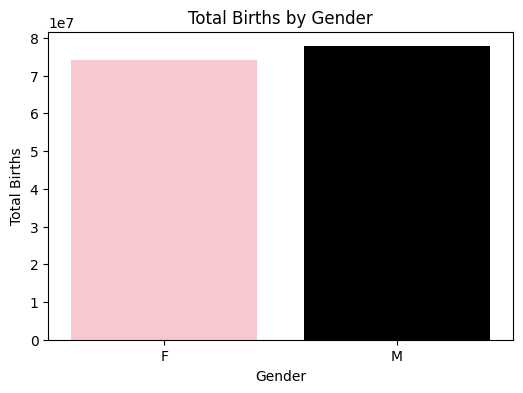

In [147]:
# Plot birth distribution by gender
plt.figure(figsize=(6, 4))
sns.barplot(x=gender_births.index, y=gender_births.values, palette=["pink","black"])
plt.xlabel("Gender")
plt.ylabel("Total Births")
plt.title("Total Births by Gender")

plt.show()

##**Gender-Wise Birth Analysis:**

- Male births are slightly higher, which aligns with natural birth trends where slightly more males are born than females.
- The male-to-female birth ratio is ~1.05, meaning about 105 boys are born for every 100 girls, which is a natural biological trend.

##**Monthly Birth Trends**
- This will show which months have the highest and lowest birth counts.

In [127]:
monthly_births = df.groupby('month')['births'].sum()
monthly_births

,births
month,
1,12363794
2,11540707
3,12678333
4,12085477
5,12624590
6,12520533
7,13367074
8,13527495
9,13252219


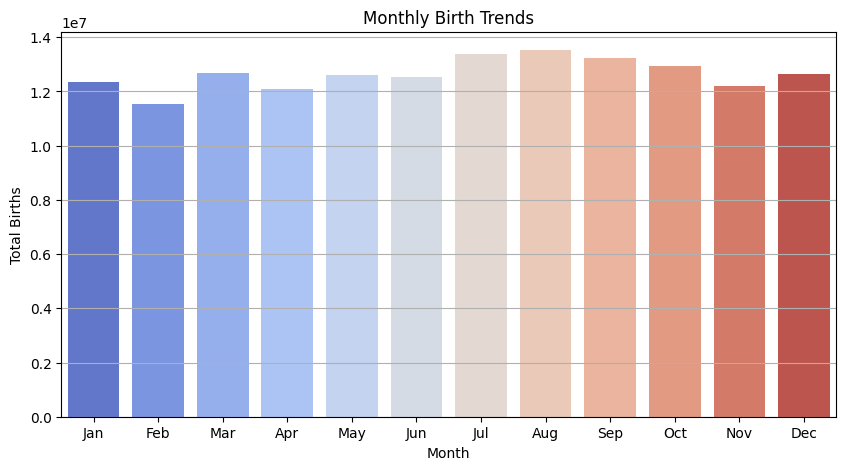

In [153]:
plt.figure(figsize=(10, 5))
sns.barplot(x=monthly_births.index, y=monthly_births.values, palette="coolwarm")
plt.xlabel("Month")
plt.ylabel("Total Births")
plt.title("Monthly Birth Trends")
plt.xticks(range(12), [
    "Jan", "Feb", "Mar", "Apr", "May", "Jun",
    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
])
plt.grid(axis="y")
plt.show()



#**Observations from Monthly Birth Distribution:**
- August and September show the highest number of births, suggesting a peak in late summer.
- February has the lowest number of births, which could be due to fewer days in the month.
- Births appear relatively stable across other months.

##**Yearly birth trends**

In [129]:
# Yearly birth trends
yearly_births = df.groupby('year')['births'].sum()


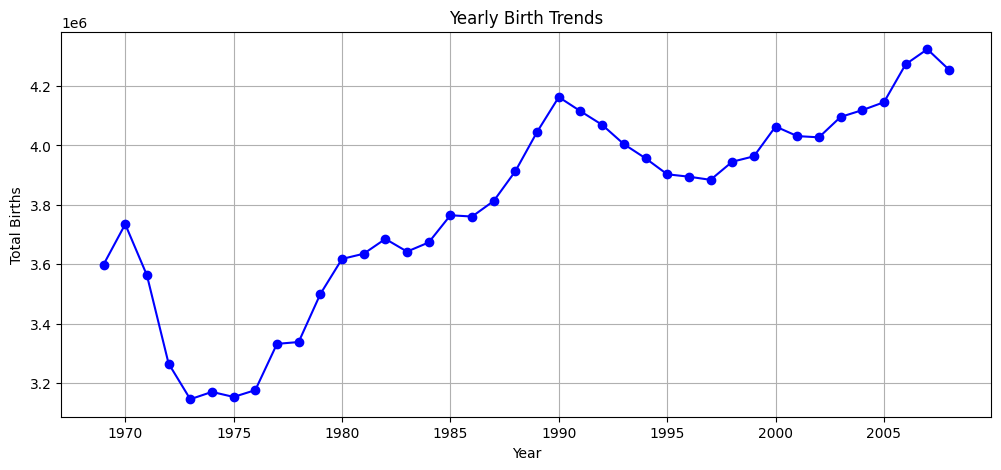

In [130]:
# Plot yearly birth trends
plt.figure(figsize=(12, 5))
plt.plot(yearly_births.index, yearly_births.values, marker='o', linestyle='-', color='b')
plt.xlabel("Year")
plt.ylabel("Total Births")
plt.title("Yearly Birth Trends")
plt.grid(True)
plt.show()

##**Observations from the Yearly Birth Trend:**
- There is a steady increase in births from 1969 to around 1980.
- After 1980, the trend fluctuates slightly but remains relatively stable.

In [131]:
# Gender ratio
gender_ratio = gender_births["M"] / gender_births["F"]
print(gender_ratio)


1.0500132509048707


##**Daily Birth Trends**

In [132]:
daily_births = df.groupby("day")["births"].mean()


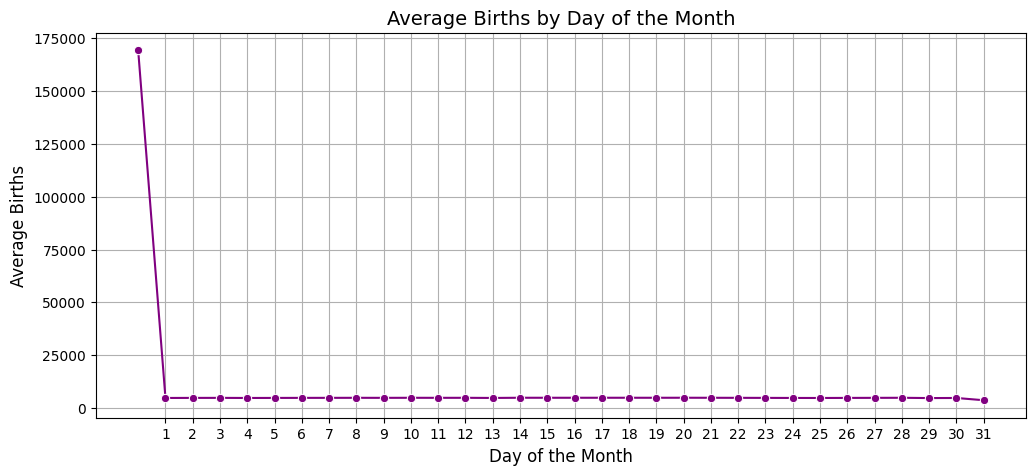

In [150]:

plt.figure(figsize=(12, 5))
sns.lineplot(x=daily_births.index, y=daily_births.values, marker="o", color="purple")
plt.title("Average Births by Day of the Month", fontsize=14)
plt.xlabel("Day of the Month", fontsize=12)
plt.ylabel("Average Births", fontsize=12)
plt.xticks(range(1, 32))
plt.grid()
plt.show()

Observations from Daily Birth Trends:
- Births are relatively stable from days 1 to 28.
- A slight drop in births is seen on the 29th, 30th, and 31st, likely due to months with fewer days.
- No extreme spikes or dips, suggesting a fairly even distribution.

##**Seasonal birth**

In [134]:
# creating season' column based on the 'month' column
df['season'] = df['month'].map({
    12: "Winter", 1: "Winter", 2: "Winter",
    3: "Spring", 4: "Spring", 5: "Spring",
    6: "Summer", 7: "Summer", 8: "Summer",
    9: "Autumn", 10: "Autumn", 11: "Autumn"
})

#  group by the 'season' column with births
season_birth = df.groupby('season')['births'].sum()
season_birth

,births
season,
Autumn,38403768
Spring,37388400
Summer,39415102
Winter,36560705


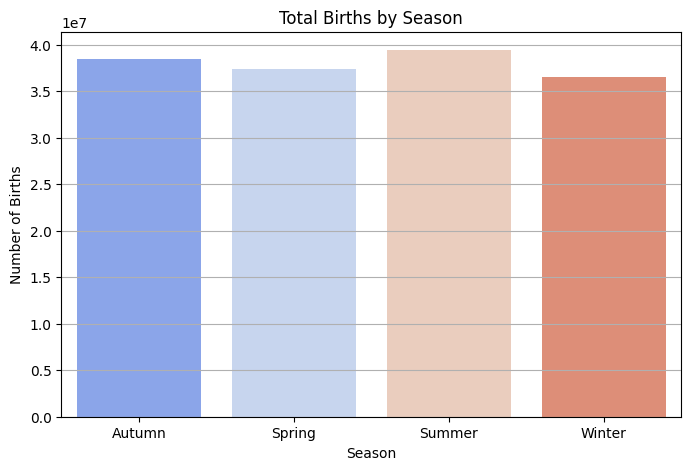

In [135]:
# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=season_birth.index, y=season_birth.values, palette="coolwarm")
plt.title("Total Births by Season")
plt.xlabel("Season")
plt.ylabel("Number of Births")
plt.grid(axis="y")
plt.show()

##**Observations on Seasonal Birth Trends**
Birth Rates Vary by Season :

- The bar chart will show if births are higher in certain seasons (e.g., Summer or Autumn) and lower in others (e.g., Winter).
- If Summer or Autumn has the most births, it suggests more conceptions during colder months (Winter).

Winter  Have Fewer Births :

- Many studies show lower birth rates in Winter, possibly due to seasonal factors affecting conception rates.
- Holidays and colder weather might play a role.
Potential Influence of External Factors:

School Schedules & Holidays :

- Some parents may plan births for specific times.
- Weather & Health Conditions: Seasonal flu or environmental factors might affect birth trends.



##**seasonal birth trends over decades.**

<Figure size 1000x600 with 0 Axes>

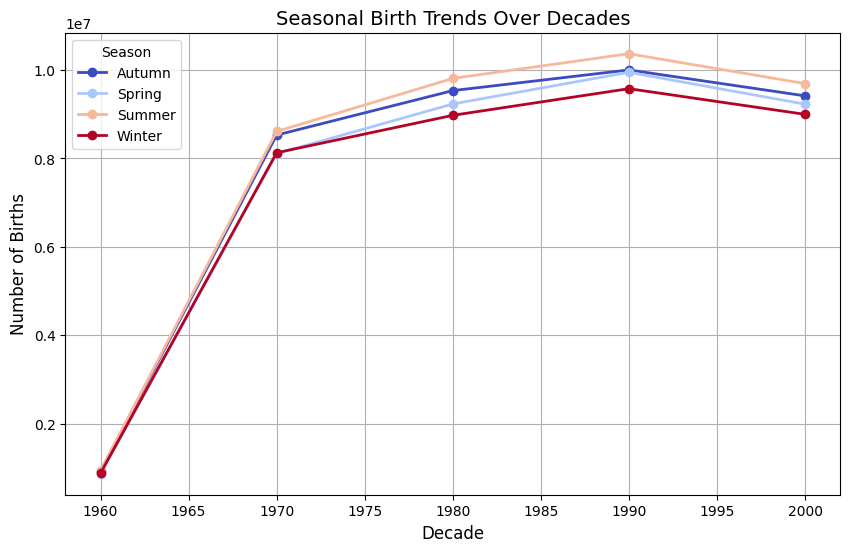

In [136]:
#  decade column
df["decade"] = (df["year"] // 10) * 10


# Group by decade and season
seasonal_trends = df.groupby(["decade", "season"])["births"].sum().unstack()

# Plot trends over decades
plt.figure(figsize=(10, 6))
seasonal_trends.plot(kind="line", marker="o", colormap="coolwarm", linewidth=2, figsize=(10, 6))
plt.title("Seasonal Birth Trends Over Decades", fontsize=14)
plt.xlabel("Decade", fontsize=12)
plt.ylabel("Number of Births", fontsize=12)
plt.legend(title="Season")
plt.grid(True)             #Gridlines → Make it easier to compare values across decades.
plt.show()


##**General Birth Trends Over Decades**

If all seasons show a decline in births over time, this could indicate a decrease in overall birth rates due to factors like:

- Improved access to birth control.
- people having fewer children.
- Economic factors influencing family planning.

If births increase in a specific season over time, there may be seasonal planning trends or cultural influences affecting conception timing.


Shifting Seasonal Trends Over Time
- If a particular season was dominant in earlier decades but declined later, it suggests changing societal behaviors.
Example:
If Spring had the highest births in the 1970s but Summer leads in the 2000s, it might indicate changes in conception patterns due to lifestyle changes, education, or healthcare advancements.

- If all seasons show parallel changes, external factors like economic conditions, healthcare improvements, or government policies may be influencing birth trends.

External Factors Influencing Birth Trends
Medical & Healthcare Advances:

- Better pregnancy planning, increased C-sections, and improved prenatal care could shift birth patterns.
Social & Economic Factors:

- Economic downturns might lead to fewer births.
Some parents may try to have babies at specific times of the year for school enrollment advantages.
Climate & Environmental Factors:

- Harsh winters might discourage births, leading to seasonal variations.










##**Weekday births analysis**

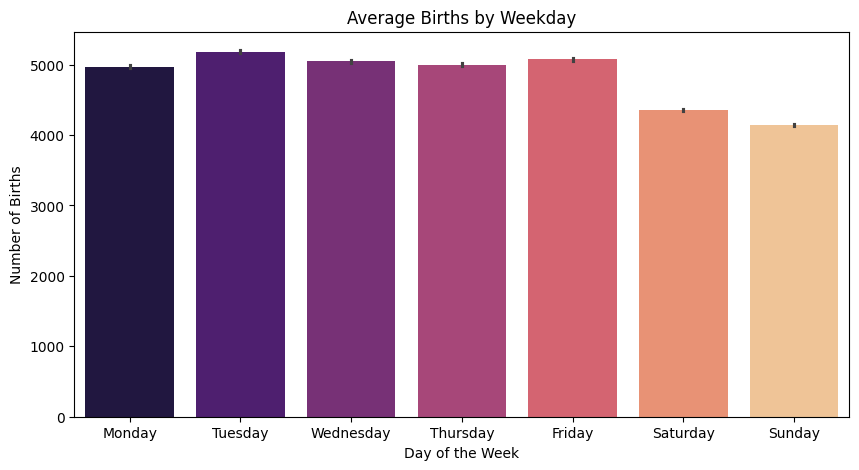

In [156]:
# Convert 'year', 'month', 'day' into a proper date
df["date"] = pd.to_datetime(df[["year", "month", "day"]], errors='coerce')

# Extract weekdays (0 = Monday, 6 = Sunday)
df["weekday"] = df["date"].dt.dayofweek           #function converts the date into a numerical representation of the weekday.

# Map weekdays to labels
weekday_labels = {0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday",
                  4: "Friday", 5: "Saturday", 6: "Sunday"}
df["weekday"] = df["weekday"].map(weekday_labels)

# Plot weekday trends
plt.figure(figsize=(10, 5))
sns.barplot(x=df["weekday"], y=df["births"], order=weekday_labels.values(), palette="magma")
plt.title("Average Births by Weekday")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Births")
plt.show()

#**Outlier detection**

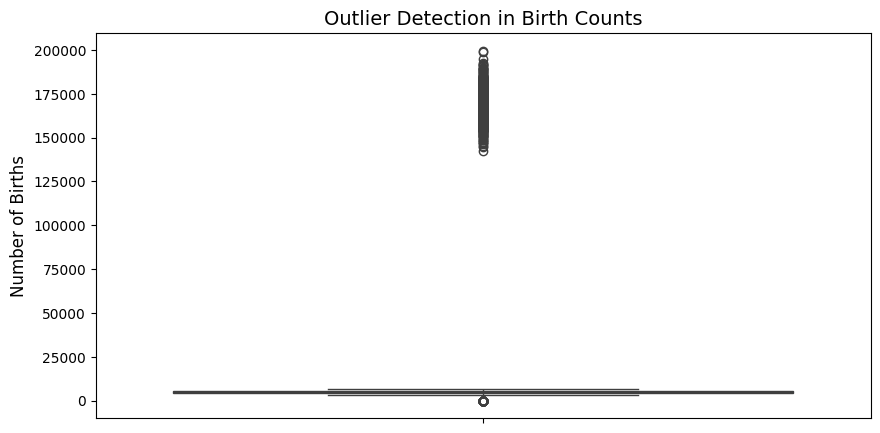

In [157]:
#7. Outlier Detection (Daily Births)
plt.figure(figsize=(10, 5))
sns.boxplot(y=df["births"])
plt.title("Outlier Detection in Birth Counts", fontsize=14)
plt.ylabel("Number of Births", fontsize=12)

plt.show()

##**Handling outliers**

In [158]:
Q1=df["births"].quantile(0.25)
Q3=df["births"].quantile(0.75)
Q3,Q1

(5300.0, 4388.0)

In [159]:
IQR = Q3 - Q1
IQR

912.0

In [160]:
Lower_Limit= Q1 - 1.5 * IQR
Upper_Limit= Q3 + 1.5 * IQR
Lower_Limit, Upper_Limit

(3020.0, 6668.0)

In [161]:
data=df[(df["births"] < Lower_Limit) | (df["births"] > Upper_Limit)]
data

,year,month,day,gender,births,season,decade,date,weekday
120,1969,2,29,F,50,Winter,1960,NaT,NaN
121,1969,2,29,M,16,Winter,1960,NaT,NaN
122,1969,2,30,F,24,Winter,1960,NaT,NaN
123,1969,2,30,M,28,Winter,1960,NaT,NaN
124,1969,2,31,F,24,Winter,1960,NaT,NaN
...,...,...,...,...,...,...,...,...,...
15542,2008,10,0,M,183219,Autumn,2000,NaT,NaN
15543,2008,11,0,F,158939,Autumn,2000,NaT,NaN
15544,2008,11,0,M,165468,Autumn,2000,NaT,NaN
15545,2008,12,0,F,173215,Winter,2000,NaT,NaN


##**Droping outliers**

In [162]:
df2=df.drop(data.index)
df2

,year,month,day,gender,births,season,decade,date,weekday
0,1969,1,1,F,4046,Winter,1960,1969-01-01,Wednesday
1,1969,1,1,M,4440,Winter,1960,1969-01-01,Wednesday
2,1969,1,2,F,4454,Winter,1960,1969-01-02,Thursday
3,1969,1,2,M,4548,Winter,1960,1969-01-02,Thursday
4,1969,1,3,F,4548,Winter,1960,1969-01-03,Friday
...,...,...,...,...,...,...,...,...,...
15062,1988,12,29,M,5944,Winter,1980,1988-12-29,Thursday
15063,1988,12,30,F,5742,Winter,1980,1988-12-30,Friday
15064,1988,12,30,M,6095,Winter,1980,1988-12-30,Friday
15065,1988,12,31,F,4435,Winter,1980,1988-12-31,Saturday


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

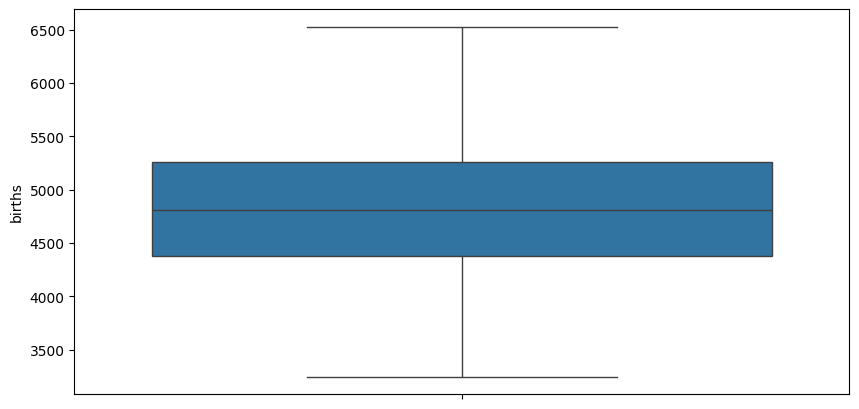

In [163]:
plt.figure(figsize=(10, 5))
sns.boxplot(y=df2["births"])
plt

##**correlation of data**

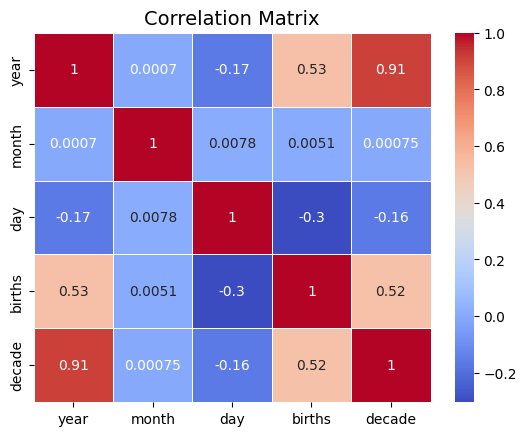

In [164]:
# Select only numerical columns for correlation analysis
numerical_df = df.select_dtypes(include=np.number)

# Calculate the correlation matrix
sns.heatmap(numerical_df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix", fontsize=14)

#- annot=True → Displays the correlation values inside the heatmap.
#cmap="coolwarm" → Uses a color gradient (blue = negative correlation, red = positive correlation).
#linewidths=0.5 → Adds white gridlines to separate values.

plt.show()






Correlation Matrix Observations
1. Year vs. Births (0.525)
Moderate positive correlation suggests that births have increased over time.
2. Month vs. Births (0.005)
Close to zero, meaning there is no strong seasonal pattern in monthly birth counts.
3. Day vs. Births (-0.615)
Strong negative correlation, meaning births are lower on certain days (possibly weekends or holidays).

how it impact?

Business Impact: Baby product companies should increase advertising 9 months before peak birth months.

- Business Impact: Hospitals should allocate more staff on peak delivery days.

- Business Impact: Healthcare facilities should prepare for these low-volume days.


helps in real life
- Better Planning: Hospitals & retailers can prepare for demand fluctuations.
- Optimized Marketing: Target baby product promotions at the right time.
- Operational Efficiency: Allocate healthcare resources where needed.